In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import geopandas as gpd
import regionmask

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from shapely.geometry import mapping

## Open shape file

<Axes: >

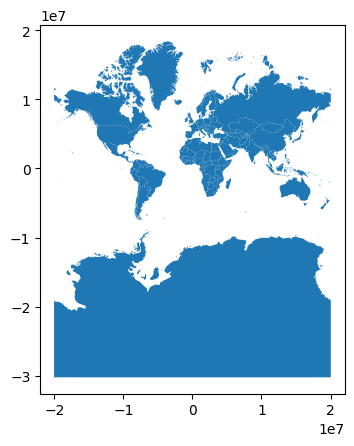

In [8]:
#%% opening the dataset
shp_file =gpd.read_file('E:/africaReport\shapeFileWholeWorld/World_Countries_Generalized.shp')
shp_region=regionmask.Regions(shp_file.geometry)
shp_file.plot()

<Axes: >

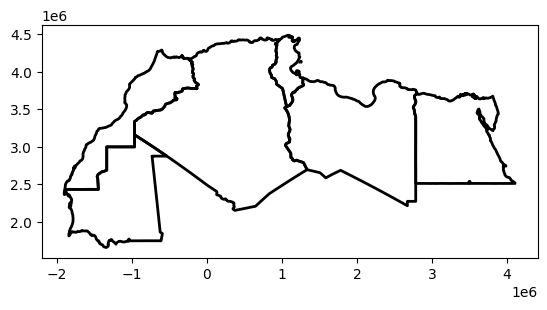

In [16]:
## Choose your area
NorthAfrica = ['Egypt', 'Libya', 'Algeria', 'Tunisia', 'Morocco', 'Mauritania']
myShapeFile = shp_file.where(shp_file['COUNTRY'].isin(NorthAfrica) )
newShape = myShapeFile.dropna()
newShape.reset_index(inplace=True)

newShape.plot(facecolor="none", edgecolor="black", linewidth=2)

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

## Open data

In [14]:
ds = xr.open_dataset('./1991-2024.nc')

## Clip data with shapefile

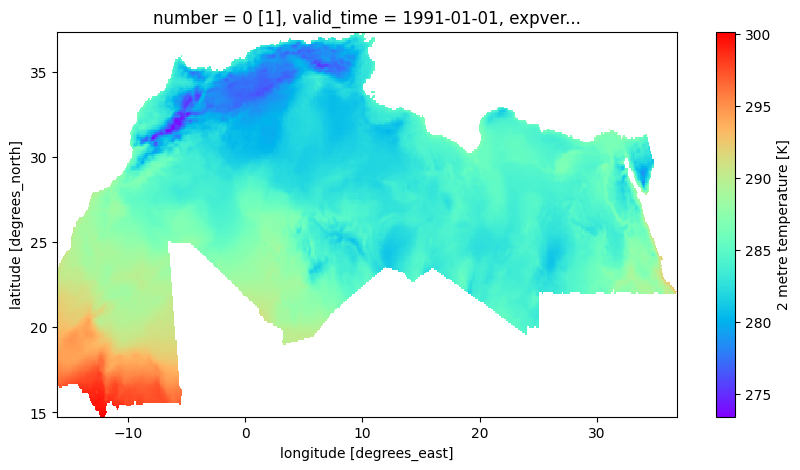

In [19]:
# Write crs in your data
ds = ds.rio.write_crs("EPSG:4326", inplace=True)

# Clip data with shapefile
era_shaped = ds.rio.clip(newShape.geometry.apply(mapping), newShape.crs)

## Plot data
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

era_shaped.t2m[0,:,:].plot(ax=ax, cmap=plt.cm.rainbow)

## Plot shape file on data

In [21]:
## Get the projection for your shapefile
newShape.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
import pyproj
from shapely.ops import transform 
def changeProjection(shape):
    reprojection = pyproj.Transformer.from_proj(3857 , 4326, always_xy=True)
    for i in shape.index:
        reprojected_geometry = transform(reprojection.transform, shape.loc[i, 'geometry']) 
        shape.at[i, 'new_geo'] = reprojected_geometry
    return(shape)

In [29]:
def plotShapeFile(Shape, ax):
       
    for i in Shape.new_geo:
        p = gpd.GeoSeries(i)
        p.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2)

In [28]:
newShape = changeProjection(newShape)

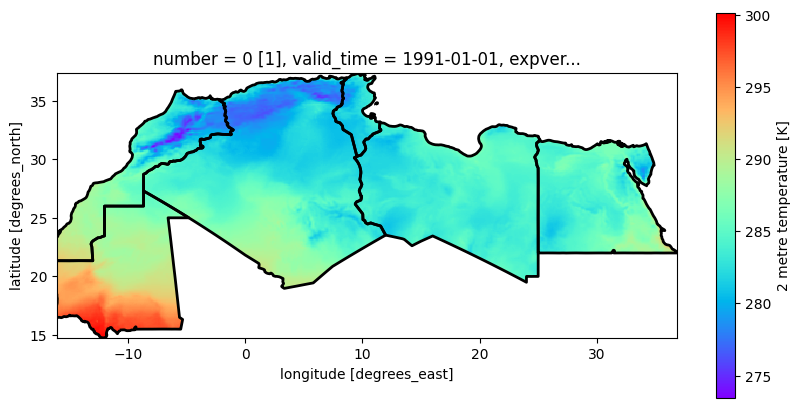

In [30]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

era_shaped.t2m[0,:,:].plot(ax=ax, cmap=plt.cm.rainbow)
plotShapeFile(newShape, ax)